# **Equipo 2**
## **Proyecto: Cancer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Gerardo Miguel Pérez Solis

## **Pregunta de investigación 1**

#### **¿Cómo ha sido el crecimiento en la incidencia del cáncer de mama en México?**

### Analizo las bd que obtuve del SICAM.
### Comenzaré con el dataset (DS) correspondiente a los datos del 2013.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d_sicam13 = pd.read_csv("Mastografias 2013.csv", encoding = 'latin-1', header = 1)
d_sicam13

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,52,2013-02-18 00:00:00.000,2013-02-18 00:00:00.000,Probablemente Benigna
1,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
2,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
3,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,69,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
4,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,44,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
...,...,...,...,...,...,...,...,...,...,...
790059,32,Zacatecas,6,Tlaltenango,20,JEREZ,43,2013-12-05 00:00:00.000,2013-12-17 00:00:00.000,Benigna
790060,32,Zacatecas,6,Tlaltenango,20,JEREZ,55,2013-12-05 00:00:00.000,2013-12-17 00:00:00.000,Negativa
790061,32,Zacatecas,6,Tlaltenango,20,JEREZ,58,2013-12-06 00:00:00.000,2013-12-17 00:00:00.000,Negativa
790062,32,Zacatecas,6,Tlaltenango,20,JEREZ,45,2013-12-06 00:00:00.000,2013-12-17 00:00:00.000,Negativa


### reviso los types en mi DS: 

In [4]:
d_sicam13.dtypes

Clave Entidad                  int64
Entidad                       object
Clave Jurisdicción             int64
Jurisdicción                  object
Clave Municipio                int64
Municipio                     object
Edad                           int64
Fecha Toma Masto              object
Fecha Interpretación Masto    object
Resultado                     object
dtype: object

### reviso la info en mi DS

In [5]:
d_sicam13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790064 entries, 0 to 790063
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Clave Entidad               790064 non-null  int64 
 1   Entidad                     790064 non-null  object
 2   Clave Jurisdicción          790064 non-null  int64 
 3   Jurisdicción                790064 non-null  object
 4   Clave Municipio             790064 non-null  int64 
 5   Municipio                   790064 non-null  object
 6   Edad                        790064 non-null  int64 
 7   Fecha Toma Masto            790064 non-null  object
 8   Fecha Interpretación Masto  790064 non-null  object
 9   Resultado                   790051 non-null  object
dtypes: int64(4), object(6)
memory usage: 60.3+ MB


In [6]:
columnas  = ['Clave Entidad', 'Clave Jurisdicción', 'Jurisdicción', 'Clave Municipio', 'Municipio']

d_sicam13 = d_sicam13.drop(columns = columnas)
d_sicam13

,Entidad,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,Aguascalientes,52,2013-02-18 00:00:00.000,2013-02-18 00:00:00.000,Probablemente Benigna
1,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
2,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
3,Aguascalientes,69,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
4,Aguascalientes,44,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
...,...,...,...,...,...
790059,Zacatecas,43,2013-12-05 00:00:00.000,2013-12-17 00:00:00.000,Benigna
790060,Zacatecas,55,2013-12-05 00:00:00.000,2013-12-17 00:00:00.000,Negativa
790061,Zacatecas,58,2013-12-06 00:00:00.000,2013-12-17 00:00:00.000,Negativa
790062,Zacatecas,45,2013-12-06 00:00:00.000,2013-12-17 00:00:00.000,Negativa


### algo que me gustaría hacer a mi DS es renombrar algunas columnas como ```Fecha Toma Masto``` y ```Fecha Interpretación Masto```, entonces procedo haciendo un remapeo con un diccionario y usando el método ```.rename()```:

In [7]:
c_rename = {
    'Fecha Interpretación Masto': 'fecha_interpretacion_masto',
    'Fecha Toma Masto': 'fecha_toma_masto',
    'Edad': 'edad',
    'Entidad': 'estado',
    'Resultado': 'resultado'
}

d_sicam13 = d_sicam13.rename(columns = c_rename)

In [8]:
#ahora checo los tipos de datos disponibles: 

d_sicam13.dtypes

estado                        object
edad                           int64
fecha_toma_masto              object
fecha_interpretacion_masto    object
resultado                     object
dtype: object

In [9]:
#ahora dropeo posibles NAN: 

d_sicam13 = d_sicam13.dropna()

In [10]:
#casteo los nuevos tipos de datos: 
dicc_conversion = {
    'estado': 'str',
    'fecha_toma_masto': 'datetime64[ms]',
    'fecha_interpretacion_masto': 'datetime64[ms]',
    'resultado': 'str'
}

d_sicam13 = d_sicam13.astype(dicc_conversion)

In [11]:
d_sicam13

,estado,edad,fecha_toma_masto,fecha_interpretacion_masto,resultado
0,Aguascalientes,52,2013-02-18,2013-02-18,Probablemente Benigna
1,Aguascalientes,48,2013-02-05,2013-02-05,Negativa
2,Aguascalientes,48,2013-02-05,2013-02-05,Negativa
3,Aguascalientes,69,2013-02-05,2013-02-05,Negativa
4,Aguascalientes,44,2013-02-05,2013-02-05,Negativa
...,...,...,...,...,...
790059,Zacatecas,43,2013-12-05,2013-12-17,Benigna
790060,Zacatecas,55,2013-12-05,2013-12-17,Negativa
790061,Zacatecas,58,2013-12-06,2013-12-17,Negativa
790062,Zacatecas,45,2013-12-06,2013-12-17,Negativa


In [12]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam13_agrupada = d_sicam13.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam13_agrupada.head()

estado
resultado                        estado                     
Altamente Sugestiva a Malignidad Aguascalientes           31
                                 Baja California          31
                                 Baja California Sur       2
                                 Campeche                 25
                                 Chiapas                   1

In [14]:
#ahora, yo quiero agrupar por tumores benignos:
d_sicam13_agrupada = d_sicam13_agrupada.loc["Benigna"]
d_sicam13_agrupada

,estado
estado,
Aguascalientes,5980
Baja California,18455
Baja California Sur,3082
Campeche,4506
Chiapas,1824
Chihuahua,11201
Ciudad de México,72224
Coahuila de Zaragoza,8065
Colima,1939


In [15]:
#renombro a la agrupación como conteo:
d_sicam13_agrupada.columns = ["conteo"]

In [16]:
conteo_2013 = d_sicam13_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam13_agrupada.sort_values(by="conteo",ascending =False).head(10)

,conteo
estado,
Estado de México,106434
Ciudad de México,72224
Puebla,57261
Jalisco,31380
Guanajuato,29521
Hidalgo,26974
Baja California,18455
Querétaro,17545
Guerrero,16467


### Así, vemos que la entidad donde se han encontrado más tumores benignos es el Estado de México en el 2013

### Ahora procederé a hacer el análogo con los demás datasets del SICAM.

In [17]:
d_sicam14 = pd.read_csv("Mastografías 2014.csv", encoding = 'latin-1', header = 1)
d_sicam14 = d_sicam14.drop(columns = columnas)

d_sicam14 = d_sicam14.rename(columns = c_rename)
d_sicam14 = d_sicam14.dropna()

d_sicam14_agrupada = d_sicam14.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam14_agrupada = d_sicam14_agrupada.loc["Benigna"]
d_sicam14_agrupada.columns = ["conteo"]

conteo_2014 = d_sicam14_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam14_agrupada.sort_values(by="conteo",ascending =False).head(10)

,conteo
estado,
Estado de México,128862
Jalisco,68559
Ciudad de México,60268
Puebla,46690
Guerrero,22580
Guanajuato,19497
Querétaro,19388
Morelos,18671
Michoacán de Ocampo,16097


In [18]:
d_sicam15 = pd.read_csv("Mastografías 2015.csv", encoding = 'latin-1', header = 1)
d_sicam15 = d_sicam15.drop(columns = columnas)

d_sicam15 = d_sicam15.rename(columns = c_rename)
d_sicam15 = d_sicam15.dropna()

d_sicam15_agrupada = d_sicam15.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam15_agrupada = d_sicam15_agrupada.loc["Benigna"]
d_sicam15_agrupada.columns = ["conteo"]

conteo_2015 = d_sicam15_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam15_agrupada.sort_values(by="conteo",ascending =False).head(10)

C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,conteo
estado,
Estado de México,163512
Ciudad de México,88042
Jalisco,61855
Puebla,35612
Guanajuato,31260
Hidalgo,29878
Morelos,25764
Guerrero,25356
Querétaro,19788


In [19]:
d_sicam16 = pd.read_csv("Mastografías 2015.csv", encoding = 'latin-1', header = 1)
d_sicam16 = d_sicam16.drop(columns = columnas)

d_sicam16 = d_sicam16.rename(columns = c_rename)
d_sicam16 = d_sicam16.dropna()

d_sicam16_agrupada = d_sicam16.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam16_agrupada = d_sicam16_agrupada.loc["Benigna"]
d_sicam16_agrupada.columns = ["conteo"]

conteo_2016 = d_sicam16_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam16_agrupada.sort_values(by="conteo",ascending =False).head(10)

C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,conteo
estado,
Estado de México,163512
Ciudad de México,88042
Jalisco,61855
Puebla,35612
Guanajuato,31260
Hidalgo,29878
Morelos,25764
Guerrero,25356
Querétaro,19788


In [20]:
d_sicam17 = pd.read_csv("Mastografías 2017.csv", encoding = 'latin-1', header = 1)
d_sicam17 = d_sicam17.drop(columns = columnas)

d_sicam17 = d_sicam17.rename(columns = c_rename)
d_sicam17 = d_sicam17.dropna()

d_sicam17_agrupada = d_sicam17.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam17_agrupada = d_sicam17_agrupada.loc["Benigna"]
d_sicam17_agrupada.columns = ["conteo"]

conteo_2017 = d_sicam17_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam17_agrupada.sort_values(by="conteo",ascending =False).head(10)

,conteo
estado,
Estado de México,107881
Ciudad de México,76025
Jalisco,56097
Michoacán de Ocampo,49096
Puebla,35393
Guanajuato,34171
Guerrero,25832
Oaxaca,22038
Querétaro,21425


In [21]:
d_sicam19 = pd.read_csv("Mastografías 2019.csv", encoding = 'latin-1', header = 1)
d_sicam19 = d_sicam19.drop(columns = columnas)

d_sicam19 = d_sicam19.rename(columns = c_rename)
d_sicam19 = d_sicam19.dropna()

d_sicam19_agrupada = d_sicam19.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam19_agrupada = d_sicam19_agrupada.loc["Benigna"]
d_sicam19_agrupada.columns = ["conteo"]

conteo_2019 = d_sicam19_agrupada.sort_values(by="conteo",ascending =False).sum()

d_sicam19_agrupada.sort_values(by="conteo",ascending =False).head(10)

,conteo
estado,
Estado de México,162374
Ciudad de México,59148
Michoacán de Ocampo,46370
Guanajuato,33867
Hidalgo,27643
Jalisco,26955
Oaxaca,26846
Puebla,22334
Guerrero,19925


### ahora veamos el conteo con respecto al tiempo: 

In [22]:
import numpy as np

conteo = np.array([conteo_2013, conteo_2014, conteo_2015, conteo_2016, conteo_2017, conteo_2019])
print(conteo)

[[538253]
 [588702]
 [688408]
 [688408]
 [629186]
 [607633]]


##### Donde podemos ver que la incidencia debido al cáncer de mama solo ha aumentado en méxico con réspecto a los años y el estado que encabeza los resultados de tomografías benignas es el Estado de México, por lo que se conluye que sería una buena idea comenzar con una campaña divulgativa del cáncer de mama en ese estado, con el objetivo de detectar estos tumores cuando aún no son benignos.

### Ahora, se analiza el siguiente dataset contenido en pdf: 

##### Mientras buscaba los datos de mortabilidad asociados al cancer de mama, pude darme cuenta que solo habían datos accesibles en formato ```pdf``` por esta razón, tuve que transformar los datos a ```csv```, para esto usé la paquetería ```tabula``` y realicé una función para automatizar la transformación de los archivos correspondientes: 

In [ ]:
#imoporto la librería y hago una prueba con un archivo:
from tabula import convert_into
convert_into("morbilidad_2013.pdf", "test.csv", output_format="csv")

In [ ]:
#defino mi transformador
def transformador(file, salida): 
    d = convert_into(file, salida, outuput_format = 'csv')
    return d

In [ ]:
#creo listas con los nombres de los archivos correspondientes: 
lista_pdf = []
lista_csv = []
for i in range(3, 10):
    lista_pdf.append(f"morbilidad_201{i}.pdf")
    lista_csv.append(f"morbilidad_201{i}.csv")
    
print(lista_pdf, '\n', lista_csv)

In [ ]:
#transformo en el rango de mis listas
for i in range(0,len(lista_pdf)):
    transformador(lista_pdf[i], lista_csv[i])

Datos disponibles en la fuente: SALUD, Dirección General de Epidemiología (DGE). (2020). Anuarios de Morbilidad 1984-2019. Disponible en: https://epidemiologia.salud.gob.mx/anuario/html/incidencia_enfermedad.html

In [12]:
# ahora procedo a realizar una limpieza de las mismas: 

morbilidad_13 = pd.read_csv('morbilidad_2013.csv', encoding = 'latin-1', header = 2)
morbilidad_13

,Unnamed: 0,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,Unnamed: 12
0,Aguascalientes,0.0,0.0,0.0,0.00,0.00,3.43,21.42,110.68,108.21,164.13,115.95,33.04
1,Baja California,0.0,0.0,0.0,0.00,0.00,1.32,18.43,31.21,71.43,80.61,73.56,20.17
2,Baja California Sur,0.0,0.0,0.0,0.00,3.17,0.00,13.87,74.44,76.53,54.70,52.92,19.30
3,Campeche,0.0,0.0,0.0,0.00,0.00,0.00,58.10,264.16,258.38,342.79,191.92,76.25
4,Coahuila,0.0,0.0,0.0,0.00,0.00,1.61,6.54,30.81,54.43,15.60,44.62,12.27
5,Colima,0.0,0.0,0.0,0.00,0.00,3.16,15.34,43.14,88.19,55.58,67.39,21.79
6,Chiapas,0.0,0.0,0.0,0.35,0.72,0.00,9.21,31.23,47.00,56.51,45.52,11.19
7,Chihuahua,0.0,0.0,0.0,0.00,0.00,1.29,18.67,49.87,97.72,81.92,72.70,24.80
8,Distrito Federal,0.0,0.0,0.0,0.00,0.58,0.54,12.27,43.73,51.69,58.16,44.41,19.66
9,Durango,0.0,0.0,0.0,0.00,0.00,0.00,14.82,73.52,79.56,135.46,80.77,24.71


#### como podemos ver este DS no tiene muchos inconvenientes, pues aunque presenta valores nulos 0, estos sí son representativos de las muestras, es decir que tienen significado.
#### el único problema verdadero es que dos columnas no tienen nombre, entonces se procede a nombrar: 

In [17]:
dicc_nombre = {
    'Unnamed: 0': 'estado',
    'Unnamed: 12': 'incidencia'
}

morbilidad_13 = morbilidad_13.rename(columns = dicc_nombre)

#### además de esto ahora voy a indexar comenzando por el estado que tiene la incidencia más alta:

In [21]:
morbilidad_13 = morbilidad_13.sort_values(by="incidencia",ascending =False).reset_index(drop = True)
morbilidad_13.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.00,0.00,0.00,58.10,264.16,258.38,342.79,191.92,76.25
1,Aguascalientes,0.0,0.0,0.0,0.00,0.00,3.43,21.42,110.68,108.21,164.13,115.95,33.04
2,Jalisco,0.0,0.0,0.0,0.28,1.12,1.99,27.16,110.88,89.91,141.10,72.41,32.39
3,Veracruz,0.0,0.0,0.0,0.00,2.68,5.67,25.41,69.23,90.19,96.98,66.66,29.85
4,San Luis Potosí,0.0,0.0,0.0,0.00,0.00,0.81,28.29,88.65,103.23,101.62,46.06,28.31


### Ahora hago lo mismo para los demás DS

In [79]:
morbilidad_14 = pd.read_csv('morbilidad_2014.csv', encoding = 'latin-1', header = 2)
morbilidad_14 = morbilidad_14.rename(columns = dicc_nombre)
morbilidad_14 = morbilidad_14.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_14))):
    if elemento != 0:
        morbilidad_14.iloc[:, elemento] = pd.to_numeric(morbilidad_14.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_14['estado'] = estado
morbilidad_14.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,2.53,0.00,2.40,50.81,243.18,272.20,280.41,202.53,91.75
1,Colima,0.0,0.0,0.0,0.00,0.00,9.40,36.25,194.82,202.90,220.61,178.38,74.71
2,Veracruz,0.0,0.0,0.0,0.56,0.27,5.35,38.21,103.95,113.34,139.61,82.70,49.08
3,Aguascalientes,0.0,0.0,0.0,0.00,0.00,3.38,39.13,96.22,124.04,118.66,132.23,48.38
4,San Luis Potosí,0.0,0.0,0.0,0.00,0.00,4.03,29.18,85.03,133.80,100.21,84.33,42.47


In [80]:
morbilidad_15 = pd.read_csv('morbilidad_2015.csv', encoding = 'latin-1', header = 2)
morbilidad_15 = morbilidad_15.rename(columns = dicc_nombre)
morbilidad_15 = morbilidad_15.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_15))):
    if elemento != 0:
        morbilidad_15.iloc[:, elemento] = pd.to_numeric(morbilidad_15.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_15['estado'] = estado
morbilidad_15.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.00,0.00,6.25,46.84,233.48,198.33,218.52,163.75,80.46
1,Colima,0.0,0.0,0.0,0.00,0.00,2.39,39.00,171.34,217.39,353.43,176.49,77.14
2,Veracruz,0.0,0.0,0.0,0.00,0.00,10.04,40.62,313.00,178.87,226.30,114.59,74.37
3,Aguascalientes,0.0,0.0,0.0,0.75,2.21,4.63,32.01,72.38,90.67,116.08,75.69,39.84
4,San Luis Potosí,0.0,0.0,0.0,0.00,0.00,0.00,20.21,71.22,114.68,60.76,105.28,36.20


In [81]:
morbilidad_16 = pd.read_csv('morbilidad_2016.csv', encoding = 'latin-1', header = 2)
morbilidad_16 = morbilidad_16.rename(columns = dicc_nombre)
morbilidad_16 = morbilidad_16.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_16))):
    if elemento != 0:
        morbilidad_16.iloc[:, elemento] = pd.to_numeric(morbilidad_16.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_16['estado'] = estado
morbilidad_16.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.0,0.00,0.00,65.61,650.08,285.07,216.03,310.86,134.35
1,Colima,0.0,0.0,0.0,6.4,0.00,0.00,37.47,108.73,194.10,264.23,164.84,70.16
2,Veracruz,0.0,0.0,0.0,0.0,0.00,2.38,26.92,158.31,118.06,199.46,111.55,51.32
3,Aguascalientes,0.0,0.0,0.0,0.0,3.62,3.74,36.58,88.45,107.90,120.03,82.47,45.58
4,San Luis Potosí,0.0,0.0,0.0,0.0,0.00,1.06,32.95,87.77,119.76,122.38,96.49,43.70


In [82]:
morbilidad_17 = pd.read_csv('morbilidad_2017.csv', encoding = 'latin-1', header = 2)
morbilidad_17 = morbilidad_17.rename(columns = dicc_nombre)
morbilidad_17 = morbilidad_17.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_17))):
    if elemento != 0:
        morbilidad_17.iloc[:, elemento] = pd.to_numeric(morbilidad_17.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_17['estado'] = estado
morbilidad_17.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.00,0.00,0.00,40.19,113.91,190.15,190.87,219.39,73.26
1,Colima,0.0,0.0,0.0,0.59,1.81,8.67,27.08,93.74,94.59,142.43,101.04,44.48
2,Veracruz,0.0,0.0,0.0,0.00,1.07,3.19,23.24,96.98,113.67,137.75,94.05,41.45
3,Aguascalientes,0.0,0.0,0.0,0.00,0.64,3.11,25.02,71.81,112.67,125.54,92.06,40.11
4,San Luis Potosí,0.0,0.0,0.0,0.00,0.74,5.34,22.64,63.64,104.62,128.44,84.77,39.78


In [83]:
morbilidad_18 = pd.read_csv('morbilidad_2018.csv', encoding = 'latin-1', header = 2)
morbilidad_18 = morbilidad_18.rename(columns = dicc_nombre)
morbilidad_18 = morbilidad_18.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_18))):
    if elemento != 0:
        morbilidad_18.iloc[:, elemento] = pd.to_numeric(morbilidad_18.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_18['estado'] = estado
morbilidad_18.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,1.2,0.00,25.54,21.79,120.48,120.18,655.77,206.79,86.67
1,Colima,0.0,0.0,0.0,0.0,0.00,6.10,35.38,147.46,198.56,239.11,228.71,78.44
2,Veracruz,0.0,0.0,0.0,0.0,0.00,6.99,30.75,90.27,114.15,144.78,144.58,49.05
3,Aguascalientes,0.0,0.0,0.0,0.0,1.83,6.28,32.61,99.53,97.82,135.75,108.65,47.21
4,San Luis Potosí,0.0,0.0,0.0,0.0,1.21,0.00,17.59,101.07,128.90,123.56,125.24,44.98


In [84]:
morbilidad_19 = pd.read_csv('morbilidad_2019.csv', encoding = 'latin-1', header = 2)
morbilidad_19 = morbilidad_19.rename(columns = dicc_nombre)
morbilidad_19 = morbilidad_19.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

#como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_19))):
    if elemento != 0:
        morbilidad_19.iloc[:, elemento] = pd.to_numeric(morbilidad_19.iloc[: ,elemento], errors = 'coerce').fillna(value = 0)

morbilidad_19['estado'] = estado
morbilidad_19.head(5)

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.0,0.00,4.67,40.26,19.69,13.74,1493.68,309.54,122.81
1,Colima,0.0,0.0,0.0,0.0,3.12,0.00,66.40,131.23,226.04,492.58,322.17,112.36
2,Veracruz,0.0,0.0,0.0,0.0,0.00,1.57,30.24,118.77,157.10,164.18,91.61,51.92
3,Aguascalientes,0.0,0.0,0.0,0.0,0.00,0.00,22.22,100.90,129.96,176.54,123.78,49.32
4,San Luis Potosí,0.0,0.0,0.0,0.0,1.21,6.89,28.41,96.98,105.24,134.09,130.02,48.90


### De la lectura de los DS podemos ver de manera inmediata que el índice ha incrementado con los años y el estado que encabeza el índice de morbilidad es Campeche, por lo que podría ser otro target para comenzar una campaña de divulgación en la prevención del cáncer de mama.

### **Pregunta de investigación 2**
#### **2. ¿Cuál es la relación entre los gastos de salud y los resultados en su política en la lucha contra el cáncer?**

En esta sección indagaremos cual ha sido el presupuesto para salud por estado de la República Mexicana y lo relacionaremos con los índices de mortalidad por cáncer de mama, con el fin de dilucidar si la dotación de presupuesto para combatir esta enfermedad ha sido adecuada.


####**Dataset 1:**
Gasto en Salud en el Sistema Nacional de Salud, México
- Observaciones: Estados de la República
- Periodo: 1993-2017
- Archivo: "1._GFF_01_2017_A_CONS_O.csv"
- Fuente: Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA).

##### **I. Carga de datos**

In [ ]:
### PRIMER DATASET: DGIS (2019). "Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)"
## I.Cargar datos en formato csv
#ADVERTENCIA: Archivo en  latin-1
gasto_salud = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/1._GFF_01_2017_A_CONS_O.csv", sep=',', encoding='latin-1')
gasto_salud.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
gasto_salud.shape

(833, 66)

In [ ]:
#Tipo de datos
gasto_salud.dtypes

Entidad Federativa                                                object
Año                                                              float64
Producto Interno Bruto                       (Miles de pesos)    float64
Gasto Total en Salud\n(I.1 + I.2)                                 object
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)      float64
                                                                  ...   
Unnamed: 61                                                      float64
Unnamed: 62                                                      float64
Unnamed: 63                                                      float64
Unnamed: 64                                                      float64
Unnamed: 65                                                      float64
Length: 66, dtype: object

In [ ]:
#Columnas
gasto_salud.columns

Index(['Entidad Federativa', 'Año',
       'Producto Interno Bruto                       (Miles de pesos)',
       'Gasto Total en Salud\n(I.1 + I.2)',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS',
       'A. Advo. Secretaria de Salud\n(Ramo 12)', 'B. FASSA (Ramo 33)',
       'C. IMSS \nProspera', 'D. SEDENA\n(Ramo 7)', 'E. SEMAR\n(Ramo 13)',
       'F. Gasto \nEstatal', '2. Gasto Total\n(A+B+C+D+E) sin SS', 'A. IMSS',
       'B. ISSSTE', 'C. PEMEX', 'D. ISSFAM', 'E. ISSES',
       'I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C)',
       'A. Gasto de los Hogares e ISFL', 'B. Cuotas de Recuperación',
       'C. Pago de Primas', 'Gasto  público total en salud como % del PIB',
       'Gasto total en salud como % del PIB',
       'Gasto público total en salud como % del gasto total en salud',
       'Gasto público total en salud como % del gasto público total',
       'Gasto público en salud

In [ ]:
#Contar NaN
gasto_salud.isna()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
829,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
#Sumar NaN por columna
gasto_salud.isna().sum(axis=0)
#Nota: Columnas "Unnamed" contienen 833 NaN

Entidad Federativa                                                 1
Año                                                                1
Producto Interno Bruto                       (Miles de pesos)      8
Gasto Total en Salud\n(I.1 + I.2)                                  1
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)        1
                                                                ... 
Unnamed: 61                                                      833
Unnamed: 62                                                      833
Unnamed: 63                                                      833
Unnamed: 64                                                      833
Unnamed: 65                                                      833
Length: 66, dtype: int64

In [ ]:
#Sumar NaN por fila
gasto_salud.isna().sum(axis=1)

0      35
1      36
2      36
3      36
4      35
       ..
828    37
829    36
830    35
831    37
832    66
Length: 833, dtype: int64

In [ ]:
#Eliminar columnas con todos los valores NaN
gasto_salud.dropna(axis=1, how='all')
#Nota: Este proceso elimina las columnas sin datos desde 'Unnamed: 31' hasta 'Unnamed: 65'

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Tlaxcala,2017.0,1.154003e+08,n.d.,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,n.d.,n.d.,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,n.d.,NaN,n.d.,n.d.,16684.35,54795.16,5.0,n.d.,n.d.,28.3,5543.41,3858.30,4374.31,94.7,n.d.
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,n.d.,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,n.d.,n.d.,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,n.d.,NaN,n.d.,n.d.,146138.83,730464.20,3.9,n.d.,n.d.,17.5,5828.40,3789.22,4510.97,80.3,n.d.
830,Yucatán,2017.0,3.004113e+08,n.d.,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,n.d.,n.d.,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,n.d.,386159.50,n.d.,n.d.,46437.95,827652.08,4.2,n.d.,n.d.,22.3,6239.37,5505.01,5875.74,75.9,n.d.
831,Zacatecas,2017.0,1.971711e+08,n.d.,7.389037e+06,4601811.37,1283617.56,2199624.15,542541.22,n.d.,n.d.,576028.44,2.787226e+06,2.178816e+06,608409.94,NaN,n.d.,NaN,n.d.,n.d.,44143.17,101928.74,3.7,n.d.,n.d.,25.7,4583.56,4637.43,4616.96,87.5,n.d.


In [ ]:
#Guardar cambios de eliminación de columnas NaN en Data Frame
gasto_salud_drop = gasto_salud.dropna(axis=1, how='all')
gasto_salud_drop

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Tlaxcala,2017.0,1.154003e+08,n.d.,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,n.d.,n.d.,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,n.d.,NaN,n.d.,n.d.,16684.35,54795.16,5.0,n.d.,n.d.,28.3,5543.41,3858.30,4374.31,94.7,n.d.
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,n.d.,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,n.d.,n.d.,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,n.d.,NaN,n.d.,n.d.,146138.83,730464.20,3.9,n.d.,n.d.,17.5,5828.40,3789.22,4510.97,80.3,n.d.
830,Yucatán,2017.0,3.004113e+08,n.d.,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,n.d.,n.d.,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,n.d.,386159.50,n.d.,n.d.,46437.95,827652.08,4.2,n.d.,n.d.,22.3,6239.37,5505.01,5875.74,75.9,n.d.
831,Zacatecas,2017.0,1.971711e+08,n.d.,7.389037e+06,4601811.37,1283617.56,2199624.15,542541.22,n.d.,n.d.,576028.44,2.787226e+06,2.178816e+06,608409.94,NaN,n.d.,NaN,n.d.,n.d.,44143.17,101928.74,3.7,n.d.,n.d.,25.7,4583.56,4637.43,4616.96,87.5,n.d.


In [ ]:
#Sin embargo, aparecen valores "n.d. que son en realidad "NaN"
#Remplazar n.d. por NaN para tener el verdadero conteo de nulos
gasto_salud_drop = gasto_salud_drop.replace('n.d.', np.NaN)
gasto_salud_drop.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN
4,Campeche,1993.0,9.559377e+07,NaN,1.568642e+06,306722.46,306722.46,NaN,NaN,NaN,NaN,NaN,1.261920e+06,1.001346e+06,52934.21,207639.73,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,2617.30,NaN,NaN


In [ ]:
#Repetir el proceso anterior de limpieza de columnas con NaN
gasto_salud_drop = gasto_salud_drop.dropna(axis=1, how='all')
gasto_salud_drop.head(4)

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN


In [ ]:
#Eliminar filas con todos los valores NaN
gasto_salud_drop.dropna(axis=0, how='all')
#Nota: Este proceso elimina la úlitma fila sin información, índice 832

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN
4,Campeche,1993.0,9.559377e+07,NaN,1.568642e+06,306722.46,306722.46,NaN,NaN,NaN,NaN,NaN,1.261920e+06,1.001346e+06,52934.21,207639.73,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,2617.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Tamaulipas,2017.0,6.078901e+08,NaN,1.934230e+07,8805405.53,2833516.97,2870723.12,357945.44,NaN,NaN,2743220.00,1.053689e+07,7.589088e+06,1225699.63,1722104.36,NaN,NaN,NaN,NaN,143654.27,1544719.11,3.2,NaN,NaN,18.2,5182.16,5540.42,5339.33,68.8,NaN
828,Tlaxcala,2017.0,1.154003e+08,NaN,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,NaN,NaN,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,NaN,NaN,NaN,NaN,16684.35,54795.16,5.0,NaN,NaN,28.3,5543.41,3858.30,4374.31,94.7,NaN
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,NaN,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,NaN,NaN,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,NaN,NaN,NaN,NaN,146138.83,730464.20,3.9,NaN,NaN,17.5,5828.40,3789.22,4510.97,80.3,NaN
830,Yucatán,2017.0,3.004113e+08,NaN,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,NaN,NaN,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,NaN,386159.50,NaN,NaN,46437.95,827652.08,4.2,NaN,NaN,22.3,6239.37,5505.01,5875.74,75.9,NaN


In [ ]:
#Guardar cambios de eliminación de fila NaN en Data Frame
gasto_salud_drop = gasto_salud_drop.dropna(axis=0, how='all')
gasto_salud_drop.tail()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
827,Tamaulipas,2017.0,607890090.0,NaN,19342297.56,8805405.53,2833516.97,2870723.12,357945.44,NaN,NaN,2743220.00,10536892.03,7589088.04,1225699.63,1722104.36,NaN,NaN,NaN,NaN,143654.27,1544719.11,3.2,NaN,NaN,18.2,5182.16,5540.42,5339.33,68.8,NaN
828,Tlaxcala,2017.0,115400274.0,NaN,5743767.63,3514829.33,1726101.32,1593398.56,8231.84,NaN,NaN,187097.61,2228938.30,1577980.71,650957.59,NaN,NaN,NaN,NaN,NaN,16684.35,54795.16,5.0,NaN,NaN,28.3,5543.41,3858.30,4374.31,94.7,NaN
829,Veracruz de Ignacio de la Llave,2017.0,940216541.0,NaN,36827405.28,19985862.61,8549440.32,6180150.09,1322403.18,NaN,NaN,3933869.02,16841542.67,11465035.10,2256865.28,3119642.29,NaN,NaN,NaN,NaN,146138.83,730464.20,3.9,NaN,NaN,17.5,5828.40,3789.22,4510.97,80.3,NaN
830,Yucatán,2017.0,300411279.0,NaN,12767041.69,5922854.79,2060160.68,1929417.46,505049.00,NaN,NaN,1428227.65,6844186.90,5412631.47,1042857.88,2538.05,NaN,386159.50,NaN,NaN,46437.95,827652.08,4.2,NaN,NaN,22.3,6239.37,5505.01,5875.74,75.9,NaN
831,Zacatecas,2017.0,197171148.0,NaN,7389037.38,4601811.37,1283617.56,2199624.15,542541.22,NaN,NaN,576028.44,2787226.01,2178816.07,608409.94,NaN,NaN,NaN,NaN,NaN,44143.17,101928.74,3.7,NaN,NaN,25.7,4583.56,4637.43,4616.96,87.5,NaN


In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                             0
Año                                                                                            0
Producto Interno Bruto                       (Miles de pesos)                                  7
Gasto Total en Salud\n(I.1 + I.2)                                                            807
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                    0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                          0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       22
B. FASSA (Ramo 33)                                                                           172
C. IMSS \nProspera                                                                           524
D. SEDENA\n(Ramo 7)                                                                          817
E. SEMAR\n(Ramo 13)           

In [ ]:
#Aún existen columnas con demasiados NaN. Asimismo, dichas columnas no son tan relevantes
#Se eliminan dichas columnas para poder tener un mejor análisis
gasto_salud_drop = gasto_salud_drop.drop(['Gasto Total en Salud\n(I.1 + I.2)', 'C. IMSS \nProspera', 'D. SEDENA\n(Ramo 7)', 'E. SEMAR\n(Ramo 13)', 'D. ISSFAM', 'E. ISSES', 'I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C)', 'A. Gasto de los Hogares e ISFL', 'Gasto total en salud como % del PIB', 'Gasto público total en salud como % del gasto total en salud', 'Gasto privado en salud per cápita'], axis=1)

In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                             0
Año                                                                                            0
Producto Interno Bruto                       (Miles de pesos)                                  7
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                    0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                          0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       22
B. FASSA (Ramo 33)                                                                           172
F. Gasto \nEstatal                                                                           206
2. Gasto Total\n(A+B+C+D+E) sin SS                                                             7
A. IMSS                                                                                        7
B. ISSSTE                     

In [ ]:
#Evaluar nuevamente los NaN por fila
gasto_salud.isna().sum(axis=1)

0      35
1      36
2      36
3      36
4      35
       ..
828    37
829    36
830    35
831    37
832    66
Length: 833, dtype: int64

In [ ]:
#Identificar fila donde inicia año 2000
gasto_salud_drop.iloc[238]

Entidad Federativa                                                                           Estados Unidos Mexicanos
Año                                                                                                              2000
Producto Interno Bruto                       (Miles de pesos)                                             1.09839e+10
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                               2.84323e+08
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                                     9.22211e+07
A. Advo. Secretaria de Salud\n(Ramo 12)                                                                   3.25241e+07
B. FASSA (Ramo 33)                                                                                        45666769.87
F. Gasto \nEstatal                                                                                        14030225.39
2. Gasto Total\n(A+B+C+D+E) sin SS                      

In [ ]:
#Eliminar filas con muchos NaN, correspondientes a los años 1993-1999, para igualar periodo con el Segundo DataFrame sobre mortalidad
gasto_salud_drop = gasto_salud_drop.drop(gasto_salud_drop.index[range(238)])

In [ ]:
gasto_salud_drop

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000.0,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,8795803.61,NaN,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000.0,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,10902.87,NaN,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000.0,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,34031.87,NaN,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000.0,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,6502.28,NaN,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000.0,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,352551.21,NaN,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Tamaulipas,2017.0,6.078901e+08,1.934230e+07,8805405.53,2833516.97,2870723.12,2743220.00,1.053689e+07,7.589088e+06,1225699.63,1722104.36,143654.27,1544719.11,3.2,18.2,5182.16,5540.42,5339.33,68.8
828,Tlaxcala,2017.0,1.154003e+08,5.743768e+06,3514829.33,1726101.32,1593398.56,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,16684.35,54795.16,5.0,28.3,5543.41,3858.30,4374.31,94.7
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,3.682741e+07,19985862.61,8549440.32,6180150.09,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,146138.83,730464.20,3.9,17.5,5828.40,3789.22,4510.97,80.3
830,Yucatán,2017.0,3.004113e+08,1.276704e+07,5922854.79,2060160.68,1929417.46,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,46437.95,827652.08,4.2,22.3,6239.37,5505.01,5875.74,75.9


In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                            0
Año                                                                                           0
Producto Interno Bruto                       (Miles de pesos)                                 0
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                   0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                         0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       0
B. FASSA (Ramo 33)                                                                            0
F. Gasto \nEstatal                                                                            1
2. Gasto Total\n(A+B+C+D+E) sin SS                                                            0
A. IMSS                                                                                       0
B. ISSSTE                               

In [ ]:
#Repetir proceso de eliminación de columnas con NaN numerosas
gasto_salud_drop = gasto_salud_drop.drop(['C. PEMEX'], axis=1)
gasto_salud_drop.head(3)

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000.0,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,NaN,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000.0,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,NaN,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000.0,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,NaN,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8


In [ ]:
#Convertir en 0 los NaN de columnas 'F. Gasto \nEstatal' y 'B. Cuotas de Recuperación'
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].fillna(0)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].fillna(0)

In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)
#Nota: Obtenemos 0 NaN

Entidad Federativa                                                                           0
Año                                                                                          0
Producto Interno Bruto                       (Miles de pesos)                                0
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                  0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                        0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                      0
B. FASSA (Ramo 33)                                                                           0
F. Gasto \nEstatal                                                                           0
2. Gasto Total\n(A+B+C+D+E) sin SS                                                           0
A. IMSS                                                                                      0
B. ISSSTE                                         

In [ ]:
# Tipo de datos
gasto_salud_drop.dtypes

Entidad Federativa                                                                            object
Año                                                                                          float64
Producto Interno Bruto                       (Miles de pesos)                                float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                  float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                        float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                      float64
B. FASSA (Ramo 33)                                                                            object
F. Gasto \nEstatal                                                                            object
2. Gasto Total\n(A+B+C+D+E) sin SS                                                           float64
A. IMSS                                                                                    

In [ ]:
#Convertir 'Año' en datetime
gasto_salud_drop['Año'] = gasto_salud_drop['Año'].apply(np.int64)
gasto_salud_drop['Año'] = pd.to_datetime(gasto_salud_drop['Año'].astype(str), format='%Y')
gasto_salud_drop.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000-01-01,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000-01-01,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000-01-01,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000-01-01,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000-01-01,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1


In [ ]:
# Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes

Entidad Federativa                                                                                   object
Año                                                                                          datetime64[ns]
Producto Interno Bruto                       (Miles de pesos)                                       float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                         float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                               float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                             float64
B. FASSA (Ramo 33)                                                                                   object
F. Gasto \nEstatal                                                                                   object
2. Gasto Total\n(A+B+C+D+E) sin SS                                                                  float64
A. IMSS                     

In [ ]:
#Convertir datos object en numéricos
gasto_salud_drop['B. FASSA (Ramo 33)'] = gasto_salud_drop['B. FASSA (Ramo 33)'].apply(np.float64)
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].apply(np.float64)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].apply(np.float64)
gasto_salud_drop['C. Pago de Primas'] = gasto_salud_drop['C. Pago de Primas'].apply(np.float64)
gasto_salud_drop['Gasto público total en salud como % del gasto público total'] = gasto_salud_drop['Gasto público total en salud como % del gasto público total'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'] = gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '] = gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '].apply(np.float64)
gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'] = gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'].apply(np.float64)

In [ ]:
#Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes
#Todos los tipos de datos object se modificaron correctamente a float64

Entidad Federativa                                                                                   object
Año                                                                                          datetime64[ns]
Producto Interno Bruto                       (Miles de pesos)                                       float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                         float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                               float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                             float64
B. FASSA (Ramo 33)                                                                                  float64
F. Gasto \nEstatal                                                                                  float64
2. Gasto Total\n(A+B+C+D+E) sin SS                                                                  float64
A. IMSS                     

In [ ]:
#Dimensión del DataFrame final
gasto_salud_drop.shape
#594 x 19

(594, 19)

In [ ]:
gasto_salud_drop.columns

Index(['Entidad Federativa', 'Año',
       'Producto Interno Bruto                       (Miles de pesos)',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS',
       'A. Advo. Secretaria de Salud\n(Ramo 12)', 'B. FASSA (Ramo 33)',
       'F. Gasto \nEstatal', '2. Gasto Total\n(A+B+C+D+E) sin SS', 'A. IMSS',
       'B. ISSSTE', 'B. Cuotas de Recuperación', 'C. Pago de Primas',
       'Gasto  público total en salud como % del PIB',
       'Gasto público total en salud como % del gasto público total',
       'Gasto público en salud per cápita para población con seguridad social',
       'Gasto público en salud per cápita para población sin seguridad social ',
       'Gasto público en salud per cápita total',
       'Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'],
      dtype='object')

In [ ]:
#Renombrar columnas: primer paso, crear mapa
column_name_mapping = {
    'Entidad Federativa' : 'Estado', 
    'Año' : 'Año',
       'Producto Interno Bruto                       (Miles de pesos)' : 'PIB en miles de pesos',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)' : 'Total gasto público en salud',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS' : 'Subtotal no asegurados',
       'A. Advo. Secretaria de Salud\n(Ramo 12)' : 'Gasto administrativo SSA', 
       'B. FASSA (Ramo 33)' : 'Aportaciones federales',
       'F. Gasto \nEstatal' : 'Gasto estatal en salud', 
       '2. Gasto Total\n(A+B+C+D+E) sin SS' : 'Subtotal asegurados', 
       'A. IMSS' : 'IMSS',
       'B. ISSSTE' : 'ISSSTE', 
       'B. Cuotas de Recuperación' : 'Cuotas de recuperación', 
       'C. Pago de Primas' : 'Primas de seguros médicos',
       'Gasto  público total en salud como % del PIB' : 'Total gasto en salud % PIB',
       'Gasto público total en salud como % del gasto público total' : 'Total gasto en salud % gasto público',
       'Gasto público en salud per cápita para población con seguridad social' : 'Gasto en salud asegurados per cápita',
       'Gasto público en salud per cápita para población sin seguridad social ' : 'Gasto en salud no asegurados per cápita',
       'Gasto público en salud per cápita total' : 'Total gasto en salud per cápita',
       'Aportación federal al financiamiento de la salud de la población sin seguridad social (%)' : 'Aportación federal % no asegurados'
}

In [ ]:
#Renombrar columnas: segundo paso, rename
gasto_salud_rename = gasto_salud_drop.rename(columns=column_name_mapping)
gasto_salud_rename.head()

,Estado,Año,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
238,Estados Unidos Mexicanos,2000-01-01,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0.0,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000-01-01,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,0.0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000-01-01,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,0.0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000-01-01,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,0.0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000-01-01,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,0.0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1


In [ ]:
#Cambiar índice a Multi-índice jerárquico tipo: Lugar, Año
gasto_salud_rename = gasto_salud_rename.set_index(['Estado', 'Año'])

In [ ]:
#Revisar multi-índice, por ejemplo las filas correspondientes al total nacional con el índice 'Estados Unidos Mexicanos'
gasto_salud_rename.loc[('Estados Unidos Mexicanos' , )]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
Año,,,,,,,,,,,,,,,,,
2000-01-01,1.098389e+10,2.843230e+08,9.222110e+07,3.252410e+07,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0.00,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
2001-01-01,1.113015e+10,2.973201e+08,9.845457e+07,3.470172e+07,49370886.99,14381964.08,1.988655e+08,1.614671e+08,27498538.85,4535439.68,18370934.32,2.7,16.6,4046.21,1858.57,2911.41,85.4
2002-01-01,1.135181e+10,3.065797e+08,1.039565e+08,3.648042e+07,49616910.18,17859211.05,2.026231e+08,1.649721e+08,27371161.63,5294857.29,20225299.61,2.7,15.7,4145.60,1906.02,2964.47,82.8
2003-01-01,1.371616e+10,3.413223e+08,1.148265e+08,3.823256e+07,55152442.53,17840391.73,2.264958e+08,1.822556e+08,31137314.77,6042391.22,22548726.44,2.5,15.8,4659.20,2046.55,3259.38,84.5
2004-01-01,1.462950e+10,3.874460e+08,1.283782e+08,3.926340e+07,57188030.78,20453576.63,2.590678e+08,2.148326e+08,31385215.25,6001726.66,24818323.23,2.6,17.6,5361.76,2227.48,3656.82,84.1
2005-01-01,1.533560e+10,3.965647e+08,1.525284e+08,5.405342e+07,62001919.83,24164585.07,2.440363e+08,1.961833e+08,34047737.81,6398953.09,28406546.92,2.6,16.7,5081.94,2579.51,3700.99,84.2
2006-01-01,1.638521e+10,4.159350e+08,1.677360e+08,6.403650e+07,64350496.44,26009530.14,2.481990e+08,1.983873e+08,35369161.31,6902849.59,31588338.69,2.5,16.1,5102.53,2806.52,3836.73,84.5
2007-01-01,1.708843e+10,4.480869e+08,1.873456e+08,7.894143e+07,64616657.66,28720208.49,2.607413e+08,2.010516e+08,44433202.72,8268915.24,36307108.86,2.6,15.8,5289.09,3097.16,4081.41,84.7
2008-01-01,1.722585e+10,4.727421e+08,2.143168e+08,9.724832e+07,67599729.43,34462002.07,2.584253e+08,1.977370e+08,44627324.68,6379616.30,37398217.51,2.7,15.2,5139.98,3512.15,4247.50,83.9


##### **III. Procesamiento y exploración de datos**

In [ ]:
## III. Análisis exploratorio de datos
import statistics
gasto_salud_rename.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 594 entries, ('Estados Unidos Mexicanos', Timestamp('2000-01-01 00:00:00')) to ('Zacatecas', Timestamp('2017-01-01 00:00:00'))
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PIB en miles de pesos                    594 non-null    float64
 1   Total gasto público en salud             594 non-null    float64
 2   Subtotal no asegurados                   594 non-null    float64
 3   Gasto administrativo SSA                 594 non-null    float64
 4   Aportaciones federales                   594 non-null    float64
 5   Gasto estatal en salud                   594 non-null    float64
 6   Subtotal asegurados                      594 non-null    float64
 7   IMSS                                     594 non-null    float64
 8   ISSSTE                                   594 non-null    float64
 9   Cuotas de recup

In [ ]:
#Estadística descriptiva
gasto_salud_rename.sum()

PIB en miles de pesos                      5.852176e+11
Total gasto público en salud               1.702426e+10
Subtotal no asegurados                     7.184743e+09
Gasto administrativo SSA                   3.242959e+09
Aportaciones federales                     2.456729e+09
Gasto estatal en salud                     1.085330e+09
Subtotal asegurados                        9.839522e+09
IMSS                                       7.524454e+09
ISSSTE                                     1.577880e+09
Cuotas de recuperación                     1.681384e+08
Primas de seguros médicos                  1.402496e+09
Total gasto en salud % PIB                 1.883400e+03
Total gasto en salud % gasto público       1.179710e+04
Gasto en salud asegurados per cápita       2.904170e+06
Gasto en salud no asegurados per cápita    2.062957e+06
Total gasto en salud per cápita            2.453217e+06
Aportación federal % no asegurados         5.168900e+04
dtype: float64

In [ ]:
#Minimo
gasto_salud_rename.min()

PIB en miles de pesos                      52760381.86
Total gasto público en salud                1785581.58
Subtotal no asegurados                       548082.52
Gasto administrativo SSA                       6526.28
Aportaciones federales                       519422.41
Gasto estatal en salud                            0.00
Subtotal asegurados                         1082969.91
IMSS                                         928988.47
ISSSTE                                        54624.00
Cuotas de recuperación                            0.00
Primas de seguros médicos                      1442.60
Total gasto en salud % PIB                        0.50
Total gasto en salud % gasto público              2.60
Gasto en salud asegurados per cápita           1865.68
Gasto en salud no asegurados per cápita         750.89
Total gasto en salud per cápita                1399.18
Aportación federal % no asegurados               44.60
dtype: float64

In [ ]:
#Máximo
gasto_salud_rename.max()

PIB en miles de pesos                      2.192124e+10
Total gasto público en salud               6.229374e+08
Subtotal no asegurados                     2.897093e+08
Gasto administrativo SSA                   1.371452e+08
Aportaciones federales                     9.177582e+07
Gasto estatal en salud                     4.492159e+07
Subtotal asegurados                        3.368723e+08
IMSS                                       2.448560e+08
ISSSTE                                     5.973233e+07
Cuotas de recuperación                     8.268915e+06
Primas de seguros médicos                  6.681742e+07
Total gasto en salud % PIB                 5.800000e+00
Total gasto en salud % gasto público       4.120000e+01
Gasto en salud asegurados per cápita       1.793227e+04
Gasto en salud no asegurados per cápita    8.868080e+03
Total gasto en salud per cápita            1.364111e+04
Aportación federal % no asegurados         1.000000e+02
dtype: float64

In [ ]:
#Estadística descriptiva
gasto_salud_rename.describe().loc[["mean", "std"]].T

,mean,std
PIB en miles de pesos,9.852149e+08,2.878697e+09
Total gasto público en salud,2.866038e+07,8.369640e+07
Subtotal no asegurados,1.209553e+07,3.641248e+07
Gasto administrativo SSA,5.459527e+06,1.700043e+07
Aportaciones federales,4.135907e+06,1.167157e+07
Gasto estatal en salud,1.827155e+06,5.536310e+06
Subtotal asegurados,1.656485e+07,4.791421e+07
IMSS,1.266743e+07,3.601873e+07
ISSSTE,2.656363e+06,8.350653e+06
Cuotas de recuperación,2.830613e+05,1.054172e+06


In [ ]:
gasto_salud_por_estado = gasto_salud_rename.groupby('Estado')['Total gasto público en salud'].agg(pd.Series.mean)
gasto_salud_por_estado.head()

Estado
Aguascalientes         5.303104e+06
Baja California        1.298864e+07
Baja California Sur    3.841075e+06
Campeche               4.683529e+06
Chiapas                1.330503e+07
Name: Total gasto público en salud, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfc7cb8b10>],
      dtype=object)

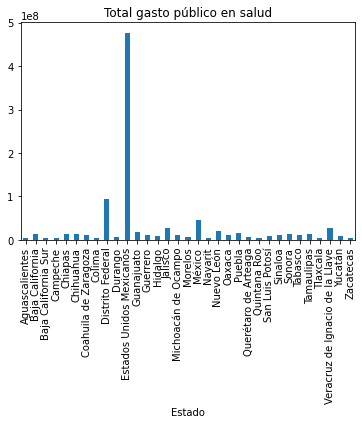

In [ ]:
#Visualización
gasto_salud_por_estado.plot(kind='bar', subplots=True)

#### **Dataset 2:**
Mortalidad cáncer de mama, México
- Observaciones: Estados de la República
- Periodo: 2000-2015
- Archivo: "MortalidadCaMa2000a2015.csv"
- Fuente: Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA)
- Descripción: Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015

##### **I. Carga de datos**

In [ ]:
### SEGUNDO DATASET: 
## I.Cargar datos en formato csv
#NOTA: Archivo en  latin-1
mortalidad = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/MortalidadCaMa2000a2015.csv", sep=',', encoding='latin-1')
mortalidad.head()

,Entidad de Residencia,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
0,Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
1,Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
2,Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
3,Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
4,Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
mortalidad.shape

(33, 33)

In [ ]:
#Tipo de datos
mortalidad.dtypes
#Nota: Los datos son numéricos

Entidad de Residencia     object
num_2000                   int64
tasa_2000                float64
num_2001                   int64
tasa_2001                float64
num_2002                   int64
tasa_2002                float64
num_2003                   int64
tasa_2003                float64
num_2004                   int64
tasa_2004                float64
num_2005                   int64
tasa_2005                float64
num_2006                   int64
tasa_2006                float64
num_2007                   int64
tasa_2007                float64
num_2008                   int64
tasa_2008                float64
num_2009                   int64
tasa_2009                float64
num_2010                   int64
tasa_2010                float64
num_2011                   int64
tasa_2011                float64
num_2012                   int64
tasa_2012                float64
num_2013                   int64
tasa_2013                float64
num_2014                   int64
tasa_2014 

In [ ]:
#Información de DataFrame
mortalidad.info

<bound method DataFrame.info of    Entidad de Residencia  num_2000  tasa_2000  ...  tasa_2014  num_2015  tasa_2015
0               Nacional      3419       14.1  ...       17.6      6252       18.0
1         Aguascalientes        36       15.6  ...       19.2        71       20.2
2        Baja California        98       16.7  ...       19.9       213       22.0
3    Baja California Sur        20       19.1  ...       15.6        33       16.0
4               Campeche        10        6.3  ...        6.8        29       11.4
5   Coahuila de Zaragoza       114       19.7  ...       21.3       215       25.7
6                 Colima        17       12.8  ...       24.1        46       22.0
7                Chiapas        53        6.3  ...       12.2       142       10.8
8              Chihuahua       152       20.9  ...       29.9       261       24.8
9       Distrito Federal       575       22.2  ...       24.0       739       24.7
10               Durango        48       14.0  ...     

In [ ]:
#Contar los NaN por columna
mortalidad.isna().sum(axis=0)
#Nota: Este DataFrame no tiene datos nulos

Entidad de Residencia    0
num_2000                 0
tasa_2000                0
num_2001                 0
tasa_2001                0
num_2002                 0
tasa_2002                0
num_2003                 0
tasa_2003                0
num_2004                 0
tasa_2004                0
num_2005                 0
tasa_2005                0
num_2006                 0
tasa_2006                0
num_2007                 0
tasa_2007                0
num_2008                 0
tasa_2008                0
num_2009                 0
tasa_2009                0
num_2010                 0
tasa_2010                0
num_2011                 0
tasa_2011                0
num_2012                 0
tasa_2012                0
num_2013                 0
tasa_2013                0
num_2014                 0
tasa_2014                0
num_2015                 0
tasa_2015                0
dtype: int64

In [ ]:
#Cambiar nombre
mortalidad_rename = mortalidad.rename(columns={'Entidad de Residencia' : 'Estado'})
mortalidad_rename.head()

,Estado,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
0,Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
1,Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
2,Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
3,Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
4,Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


In [ ]:
#Cambiar índice a 'Entidad de Residencia'
mortalidad_rename = mortalidad_rename.set_index(['Estado'])

In [ ]:
#Revisar cambio
mortalidad_rename.head()

,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
Estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


##### **III. Procesamiento y exploración**

In [ ]:
## III. Análisis exploratorio de datos
mortalidad_rename.sum(axis=1)

Estado
Nacional                75443.9
Aguascalientes           1080.7
Baja California          2628.0
Baja California Sur       783.9
Campeche                  480.2
Coahuila de Zaragoza     2721.3
Colima                    852.3
Chiapas                  1792.7
Chihuahua                3534.1
Distrito Federal        10478.6
Durango                  1238.9
Guanajuato               3476.4
Guerrero                 1556.8
Hidalgo                  1529.2
Jalisco                  6623.2
México                   9201.9
Michoacán de Ocampo      2891.9
Morelos                  1399.7
Nayarit                   901.0
Nuevo León               4636.0
Oaxaca                   1553.5
Puebla                   2982.1
Querétaro de Arteaga     1321.5
Quintana Roo              531.5
San Luis Potosí          1678.7
Sinaloa                  2329.2
Sonora                   2653.0
Tabasco                  1186.1
Tamaulipas               2990.0
Tlaxcala                  715.9
Veracruz Llave           4969.2
Y

In [ ]:
#Máximo
mortalidad_rename.max(axis=1)

Estado
Nacional                6252.0
Aguascalientes            71.0
Baja California          213.0
Baja California Sur       39.0
Campeche                  30.0
Coahuila de Zaragoza     215.0
Colima                    49.0
Chiapas                  157.0
Chihuahua                308.0
Distrito Federal         739.0
Durango                   92.0
Guanajuato               277.0
Guerrero                 118.0
Hidalgo                  119.0
Jalisco                  495.0
México                   743.0
Michoacán de Ocampo      215.0
Morelos                  105.0
Nayarit                   58.0
Nuevo León               386.0
Oaxaca                   125.0
Puebla                   227.0
Querétaro de Arteaga     106.0
Quintana Roo              59.0
San Luis Potosí          119.0
Sinaloa                  189.0
Sonora                   233.0
Tabasco                   98.0
Tamaulipas               214.0
Tlaxcala                  45.0
Veracruz Llave           383.0
Yucatán                   88.0
Z

In [ ]:
#Mínimo
mortalidad_rename.min(axis=1)

Estado
Nacional                14.1
Aguascalientes          13.0
Baja California         15.7
Baja California Sur     15.6
Campeche                 6.3
Coahuila de Zaragoza    16.9
Colima                  12.8
Chiapas                  6.2
Chihuahua               18.6
Distrito Federal        19.3
Durango                 11.9
Guanajuato              10.6
Guerrero                 8.1
Hidalgo                 10.2
Jalisco                 17.5
México                  11.8
Michoacán de Ocampo     11.9
Morelos                  9.8
Nayarit                 11.9
Nuevo León              17.1
Oaxaca                   7.2
Puebla                   9.6
Querétaro de Arteaga     9.9
Quintana Roo             3.9
San Luis Potosí          8.9
Sinaloa                 12.4
Sonora                  17.6
Tabasco                  7.9
Tamaulipas              16.2
Tlaxcala                 6.4
Veracruz Llave          11.7
Yucatán                  7.2
Zacatecas               10.7
dtype: float64

In [ ]:
#Estadística descriptiva
mortalidad_rename.describe().loc[["mean", "std"]].T

,mean,std
num_2000,207.212121,588.299178
tasa_2000,13.312121,4.775311
num_2001,215.939394,612.902569
tasa_2001,13.469697,3.974960
num_2002,231.636364,656.996900
tasa_2002,14.257576,4.582373
num_2003,234.000000,663.530472
tasa_2003,14.087879,4.371696
num_2004,251.515152,712.379951
tasa_2004,14.666667,4.147414


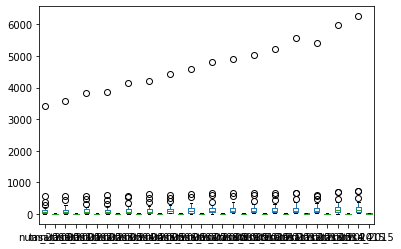

In [ ]:
#Visualización
mortalidad_rename.plot(kind='box', subplots=False)

###**Bases de datos:**
DGIS (9 de mayo de 2019). “Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)”, Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: http://www.dgis.salud.gob.mx/descargas/xls/1._GFF_01_2017_A_CONS_O.xlsx

DGIS (2 de diciembre de 2016). "Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015", Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: https://www.gob.mx/cms/uploads/attachment/file/269549/MortalidadCaMa2000a2015.pdf



### **Pregunta de investigación 3**
#### **2. ¿Qué factores influyen en la incidencia del cáncer de mama en mujeres?**

En esta sección indagaremos en los resultados obtenidos en mastografías realizadas en 2019, con el fin de comprobar si la edad de una mujer tiene incidencia en el desarrollo de cáncer de mama

In [ ]:
#Importacion de paquetes
import pandas as pd

 Dataset 1:

Resultados de Mastografías en México en 2019

In [ ]:
#carga de datos 
mastografias_2019 = pd.read_csv("/Mastografías 2019.csv",sep=",",encoding="latin-1",header=1)

In [ ]:
mastografias_2019.head(5)

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,AGUASCALIENTES,45.0,04/11/2019,04/11/2019,Benigna
1,1.0,Aguascalientes,1.0,Aguascalientes,1.0,AGUASCALIENTES,55.0,03/11/2019,03/11/2019,Benigna
2,1.0,Aguascalientes,1.0,Aguascalientes,1.0,AGUASCALIENTES,61.0,04/11/2019,04/11/2019,Benigna
3,1.0,Aguascalientes,1.0,Aguascalientes,1.0,AGUASCALIENTES,60.0,03/11/2019,03/11/2019,Benigna
4,1.0,Aguascalientes,1.0,Aguascalientes,1.0,AGUASCALIENTES,52.0,09/11/2019,09/11/2019,Benigna


In [ ]:
#Solo se seleccionan las columnas para el analisis
mastografias_2019_copia = mastografias_2019.copy()
mastografias_2019_copia = mastografias_2019_copia[["Edad","Fecha Interpretación Masto","Resultado"]]

In [ ]:
#Se buscan diferentes edades que existen en el df
mastografias_2019_copia['Edad'].unique()

array([45., 55., 61., 60., 52., 59., 56., 66., 53., 47., 50., 62., 51.,
       42., 46., 41., 65., 57., 43., 58., 54., 48., 68., 67., 44., 64.,
       40., 49., 69., 38., 37., 63., 32., 33., 35., 39., 36., 34., 28.,
       30., 27., 29., 31., 26., 25., nan])

In [ ]:
#se busca si existen valores NaN
mastografias_2019_copia.isna().sum(axis=0)

Edad                          26186
Fecha Interpretación Masto    26186
Resultado                     26186
dtype: int64

In [ ]:
#Eliminaciond valores NaN
mastografias_2019_copia = mastografias_2019_copia.dropna(axis=0)

In [ ]:
# Comprobacion de que se eliminaron los datos NaN
print(mastografias_2019_copia.isna().sum(axis=0))
print(mastografias_2019.shape)
print(mastografias_2019_copia.shape)

(816904, 10)
(790718, 3)


In [ ]:
# Se buscan los diferentes tipos de resultados que se obtuvieron
mastografias_2019_copia['Resultado'].unique()

array(['Benigna', 'Negativa', 'Riesgo Moderado de Malignidad',
       'Anormalidad Sospechosa', 'Riesgo Intermedio de Malignidad',
       'Altamente Sugestiva a Malignidad', 'Probablemente Benigna',
       'Evaluación Adicional', 'Baja Sospecha de Malignidad'],
      dtype=object)

In [ ]:
#Se realiza conteo de registros por resultado y edad
agrupacion_resultado = mastografias_2019_copia.groupby(["Resultado","Edad"])[["Edad"]].agg("count")
agrupacion_resultado

Edad
Resultado                        Edad      
Altamente Sugestiva a Malignidad 26.0     1
                                 27.0     1
                                 28.0     1
                                 30.0     2
                                 31.0     3
...                                     ...
Riesgo Moderado de Malignidad    65.0    10
                                 66.0     7
                                 67.0     6
                                 68.0     5
                                 69.0     6

[385 rows x 1 columns]

In [ ]:
#Promedio, mediana y desviación estandar de edad por cada tipo de resultado
print(mastografias_2019_copia.groupby(["Resultado"])[["Edad"]].agg(['mean', 'median', 'std']))
#Suma de registros por cada tipo de resultado
print(mastografias_2019_copia.groupby(["Resultado"])[["Edad"]].count().sort_values(by="Edad"))

                                       Edad                 
                                       mean median       std
Resultado                                                   
Altamente Sugestiva a Malignidad  52.808333   53.0  8.625744
Anormalidad Sospechosa            50.874771   50.0  7.833224
Baja Sospecha de Malignidad       50.168142   49.0  7.786495
Benigna                           51.823739   51.0  7.608225
Evaluación Adicional              49.026600   48.0  6.974052
Negativa                          50.781357   50.0  7.294853
Probablemente Benigna             50.198712   49.0  7.381009
Riesgo Intermedio de Malignidad   50.969422   50.0  8.209983
Riesgo Moderado de Malignidad     51.384817   50.0  8.707018
                                    Edad
Resultado                               
Riesgo Moderado de Malignidad        382
Riesgo Intermedio de Malignidad      883
Baja Sospecha de Malignidad          904
Altamente Sugestiva a Malignidad    1080
Anormalidad Sospechosa

## Resultado Benigno

In [ ]:
#Top10 de edades donde el resultado de la mastografía fue Benigno. 
agrupacion_resultado.columns =["Conteo"]
print("\n10 primeras edades donde el resultado es Benigno")
print(agrupacion_resultado.loc["Benigna"].sort_values(by="Conteo",ascending =False).head(10))
print("\n10 ultimas edades donde el resultado es Benigno")
print(agrupacion_resultado.loc["Benigna"].sort_values(by="Conteo",ascending =False).tail(10))


10 primeras edades donde el resultado es Benigno
      Conteo
Edad        
45.0   28904
47.0   28810
46.0   28748
44.0   28253
48.0   27622
50.0   27366
49.0   27185
43.0   26936
51.0   26243
52.0   25498

10 ultimas edades donde el resultado es Benigno
      Conteo
Edad        
34.0      97
33.0      49
32.0      44
31.0      39
30.0      27
29.0      22
28.0      22
27.0      12
25.0      10
26.0       8


In [ ]:
# Analisis solo con mujeres mayores de 40 años
solo_mayores_40 = mastografias_2019_copia[mastografias_2019_copia["Edad"]>=40]
solo_mayores_40 = solo_mayores_40.groupby(["Resultado"])[["Edad"]].agg("count")
print(solo_mayores_40)
print("\nPorcentaje de resultado Bedigno: ")
print(((solo_mayores_40.loc["Benigna"].sum())/(agrupacion_resultado.loc[["Benigna"]].sum()))*100)

                                    Edad
Resultado                               
Altamente Sugestiva a Malignidad    1024
Anormalidad Sospechosa              2666
Baja Sospecha de Malignidad          871
Benigna                           605352
Evaluación Adicional               52811
Negativa                          108100
Probablemente Benigna              14899
Riesgo Intermedio de Malignidad      852
Riesgo Moderado de Malignidad        353

Porcentaje de resultado Bedigno: 
Conteo    99.624609
dtype: float64


## Resultado entre intermedio y alto de Malignidad

In [ ]:
solo_mayores_40 = mastografias_2019_copia[mastografias_2019_copia["Edad"]>=40]
solo_mayores_40 = solo_mayores_40.groupby(["Resultado"])[["Edad"]].agg("count")
(solo_mayores_40.loc["Altamente Sugestiva a Malignidad"].sum())/(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sum())

Conteo    0.521651
dtype: float64

In [ ]:
#Top10 de edades donde el resultado de la mastografía fue Negativa. 
print("\n10 primeras edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad")
print(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sort_values(by ="Conteo",ascending =False).head(10))
print("\n10 ultimas edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad")
print(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sort_values(by="Conteo",ascending =False).tail(10))


10 primeras edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad
                                       Conteo
Resultado                        Edad        
Riesgo Intermedio de Malignidad  47.0      54
Altamente Sugestiva a Malignidad 45.0      52
                                 54.0      46
Riesgo Intermedio de Malignidad  42.0      46
Altamente Sugestiva a Malignidad 53.0      45
                                 61.0      44
                                 55.0      44
                                 46.0      44
Riesgo Intermedio de Malignidad  48.0      42
Altamente Sugestiva a Malignidad 57.0      42

10 ultimas edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad
                                       Conteo
Resultado                        Edad        
Riesgo Intermedio de Malignidad  31.0       2
                                 29.0       2
Altamente Sugestiva a Malignidad 30.0       2
                     

### Analisis sin resultados Benignos

In [ ]:
sin_benignos = mastografias_2019_copia[mastografias_2019_copia["Resultado"]!="Benigna"]
#agrupacion
sin_benignos = sin_benignos.groupby(["Resultado"])[["Edad"]].agg("count")
print(sin_benignos)
print("\nPorcentaje de resultado Bedigno: ")
print(((sin_benignos.loc["Altamente Sugestiva a Malignidad"])/(sin_benignos["Edad"].sum()))*100)
print(((sin_benignos.loc["Riesgo Intermedio de Malignidad"])/(sin_benignos["Edad"].sum()))*100)

                                    Edad
Resultado                               
Altamente Sugestiva a Malignidad    1080
Anormalidad Sospechosa              2731
Baja Sospecha de Malignidad          904
Evaluación Adicional               53459
Negativa                          108579
Probablemente Benigna              15067
Riesgo Intermedio de Malignidad      883
Riesgo Moderado de Malignidad        382

Porcentaje de resultado Bedigno: 
Edad    0.58989
Name: Altamente Sugestiva a Malignidad, dtype: float64
Edad    0.48229
Name: Riesgo Intermedio de Malignidad, dtype: float64


### Conclusion pregunta 3
Se puede observar que una gran parte de las personas que se realizaron una mastografía obtuvieron un resultado "Benigno", por otro lado, fijandonos en los resultados "Malignos" estos ocupan un porcentaje minimo en la muestra total, sin embargo se lográ apreciar que las mujeres mayores de 40 años son las más propensas a tener un resultado Maligno.

###**Bases de datos:**
Datos del Centro Nacional de Equidad de Género y Salud Reproductiva: 
 https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama

## **Hipótesis:**

#### **¿Está México consciente de la problemática que trae consigo este problema de salud?**

### Para responder esta pregunta se tienen dos datasets que contienen informaciónk acerca de la divulgación o atención que se le da al tema 

### comenzando por los datos de google trends: 

In [2]:
import matplotlib.pyplot as plt

interes_time = pd.read_csv('interes_cancer_de_mama_tema.csv', header = 1)
interes_time

,Mes,Cáncer de mama: (México)
0,2012-01,17
1,2012-02,19
2,2012-03,22
3,2012-04,16
4,2012-05,21
...,...,...
92,2019-09,31
93,2019-10,97
94,2019-11,32
95,2019-12,19


In [3]:
list(interes_time)

['Mes', 'Cáncer de mama: (México)']

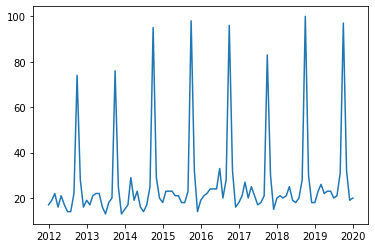

In [4]:
#renombro las columnas:

nombres = {
    'Mes': 'fecha',
    'Cáncer de mama: (México)':'interes_en_cancer'
}

interes_time = interes_time.rename(columns = nombres)

#cambio el tipo de dato 'mes', por uno fecha:
interes_time['fecha'] = pd.to_datetime(interes_time['fecha'])

plt.plot(interes_time['fecha'], interes_time['interes_en_cancer'])

##### Así, el data set nos dice que la atención que se le ha dado al tema ha aumentado desde el 2012. Aun así, la atención que la población en general tiene acerca del problema no ha cambiado en los últimos años, lo que puede notarse con respecto al umento del índice de morbilidad, por ejemplo, ya que una alta atención en el tema implicaría que la población tiene conocimiento acerca de la prevención de esta enfermedad, por ejemplo.

### Ahora pasoa analizar los datos recopilados mediante WebScrapping:

### primero pondré aquí el código que usé para realizar el scrapping: 

```Python
from selenium import webdriver
import time
import numpy as np
from numpy import random

#despliego el navegador
options = webdriver.ChromeOptions()
options.add_argument('--disable-extensions')

PATH = "C:\Program Files (x86)\chromedriver.exe"

driver = webdriver.Chrome(PATH)
url = 'https://www.google.com/search?q=cáncer+de+mama&lr=&cr=countryMX&hl=es&as_qdr=all&tbs=ctr:countryMX,cdr:1,cd_min:1/1/2013,cd_max:12/31/2013&sxsrf=ALeKk02jBq5CdA22tqCvC5cfnr1OMU7hmQ:1615318039798&filter=0&biw=1536&bih=723'
driver.get(url)

#formo todo en un webscrapper sobre google results: 

f = open('google_cancer_mama_2013.csv', 'w')

f.write(('titulo, link, fecha' +'\n'))
c = []

a = False

for i in range(0,99):
    
    for element in driver.find_elements_by_xpath('//div[@class="g"]'):
        
        titulo = element.find_element_by_xpath('.//h3').text
        c += element.find_elements_by_xpath('.//span[@class = "f"]')
    
        if len(c)>0:
            fecha = c[0].text
        else:
            fecha = str(np.nan)
        
        c = []
        link = element.find_element_by_xpath('.//div[@class = "yuRUbf"]/a').get_attribute('href')
        f.write(titulo.replace(',','|') +','+link.replace(',','|')+','+fecha.replace(',','|')+'\n')
    
        a = random.choice([True, False, False])
        t = random.choice([5,6,9,7,8,10,12,15,20,25,22,13,])

    print(f'vamos en la página: {i+1}. Los segundos de espera son: {t}')
    #hago un mini intento de "engañar" el motor de búsqueda de google:
    if a == True:
        time.sleep(t)
    else: 
        time.sleep(t)

    Next_Google_page = driver.find_element_by_link_text("Siguiente").click()
    driver.refresh()


f.close()

```

### Ahora los datos:

In [41]:
scrap_2013 = pd.read_csv('google_cancer_mama_2013.csv', header = 0, encoding="latin-1")
scrap_2013

,titulo,link,fecha
0,Investigación genómica contra el cáncer de mam...,http://ciencia.unam.mx/leer/273/Investigacion_...,18 oct. 2013 -
1,NaN,https://www.cancer.net/es/tipos-de-c%C3%A1ncer...,NaN
2,NaN,https://www.cdc.gov/spanish/cancer/breast/basi...,NaN
3,NaN,https://www.unotv.com/nacional/cancer-de-mama-...,NaN
4,NaN,https://www.cancer.net/es/tipos-de-c%C3%A1ncer...,NaN
...,...,...,...
212,Cuerpo | Salud180,https://www.salud180.com/salud-dia-a-dia/habit...,27 feb. 2013 -
213,Encuentra el amor con Pokémon Go | ELIMPARCIAL...,https://www.elimparcial.com/sonora/estilos/Enc...,16 ago. 2013 -
214,Izúcar de Matamoros - Municipios Puebla | Noti...,https://m.municipiospuebla.mx/index.php/tags/i...,3 jul. 2013 -
215,Dra. Susan Love,http://tomateloapecho.org.mx/Pdfs/Seminario%20...,15 ago. 2013 -


### limpio los NAN

In [42]:
#Eliminar columnas con todos los valores NaN
scrap_2013 = scrap_2013.dropna(axis=0, how='any').reset_index(drop = True)

#cambio de nombres
nombres = {
    ' link':'link',
    ' fecha':'fecha'
}

#cambio los nombres
scrap_2013 = scrap_2013.rename(columns = nombres)
scrap_2013

,titulo,link,fecha
0,Investigación genómica contra el cáncer de mam...,http://ciencia.unam.mx/leer/273/Investigacion_...,18 oct. 2013 -
1,Médica Sur apoya la información y diagnóstico ...,http://www.medicasur.com.mx/es_mx/ms/medica-su...,1 oct. 2013 -
2,BOLETÍN CÁNCER DE MAMA - Disur,http://www.distribuidoradisur.com.mx/Newslette...,19 oct. 2013 -
3,El cáncer de mama - Blog UDLAP,http://blog.udlap.mx/blog/2013/10/sobre-cancer...,18 oct. 2013 -
4,¿QUÉ ES EL CÁNCER DE MAMA? - Beneficencia Espa...,https://www.beneficenciaespanola.com.mx/que-es...,26 jul. 2013 -
...,...,...,...
208,Cuerpo | Salud180,https://www.salud180.com/salud-dia-a-dia/habit...,27 feb. 2013 -
209,Encuentra el amor con Pokémon Go | ELIMPARCIAL...,https://www.elimparcial.com/sonora/estilos/Enc...,16 ago. 2013 -
210,Izúcar de Matamoros - Municipios Puebla | Noti...,https://m.municipiospuebla.mx/index.php/tags/i...,3 jul. 2013 -
211,Dra. Susan Love,http://tomateloapecho.org.mx/Pdfs/Seminario%20...,15 ago. 2013 -


##### hago un strip de fecha, quiero ver la concentración de publicaciones por mes:


In [43]:
scrap_2013['mes'] = scrap_2013['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]
scrap_2013

,titulo,link,fecha,mes
0,Investigación genómica contra el cáncer de mam...,http://ciencia.unam.mx/leer/273/Investigacion_...,18 oct. 2013 -,oct.
1,Médica Sur apoya la información y diagnóstico ...,http://www.medicasur.com.mx/es_mx/ms/medica-su...,1 oct. 2013 -,oct.
2,BOLETÍN CÁNCER DE MAMA - Disur,http://www.distribuidoradisur.com.mx/Newslette...,19 oct. 2013 -,oct.
3,El cáncer de mama - Blog UDLAP,http://blog.udlap.mx/blog/2013/10/sobre-cancer...,18 oct. 2013 -,oct.
4,¿QUÉ ES EL CÁNCER DE MAMA? - Beneficencia Espa...,https://www.beneficenciaespanola.com.mx/que-es...,26 jul. 2013 -,jul.
...,...,...,...,...
208,Cuerpo | Salud180,https://www.salud180.com/salud-dia-a-dia/habit...,27 feb. 2013 -,feb.
209,Encuentra el amor con Pokémon Go | ELIMPARCIAL...,https://www.elimparcial.com/sonora/estilos/Enc...,16 ago. 2013 -,ago.
210,Izúcar de Matamoros - Municipios Puebla | Noti...,https://m.municipiospuebla.mx/index.php/tags/i...,3 jul. 2013 -,jul.
211,Dra. Susan Love,http://tomateloapecho.org.mx/Pdfs/Seminario%20...,15 ago. 2013 -,ago.


### ahora agrupo por mes:

In [44]:
#me doy cuenta de que hay cosas coladas...

scrap_2013["mes"].unique()

array(['oct.', 'jul.', 'L', 'feb.', 'nov.', 'sep.', 'N', 'MA', 'abr.',
       'jun.', 'dic.', 'R', 'M', 'ago.', 'ÁN', 'P', 'may.', 'JM', 'LL',
       'ene.', 'C', 'mar.', 'J', 'JEA', 'Á', 'LAS', 'MLM', 'ZC', 'MPM',
       'A', 'JA', 'YL', 'KEF', 'G', 'O', 'CH', 'AL', 'SA', 'LJ', 'HDG',
       'PJ', 'CI'], dtype=object)

In [45]:
#remapeo para eliminar mediante NA: 

meses = {
    'ene.':'enero',
    'feb.':'febrero',
    'mar.':'marzo',
    'abr.':'abril',
    'may.': 'mayo', 
    'jun.': 'junio',
    'jul.': 'julio',
    'ago.': 'agosto',
    'sep.': 'septiembre',
    'oct.': 'octubre',
    'nov.': 'noviembre',
    'dic.':'diciembre'
}

scrap_2013['meses'] = scrap_2013['mes'].map(meses)

In [46]:
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2013 = scrap_2013.dropna(axis=0, how='any').reset_index(drop = True)


In [48]:
scrap_2013

,titulo,link,fecha,mes,meses
0,Investigación genómica contra el cáncer de mam...,http://ciencia.unam.mx/leer/273/Investigacion_...,18 oct. 2013 -,oct.,octubre
1,Médica Sur apoya la información y diagnóstico ...,http://www.medicasur.com.mx/es_mx/ms/medica-su...,1 oct. 2013 -,oct.,octubre
2,BOLETÍN CÁNCER DE MAMA - Disur,http://www.distribuidoradisur.com.mx/Newslette...,19 oct. 2013 -,oct.,octubre
3,El cáncer de mama - Blog UDLAP,http://blog.udlap.mx/blog/2013/10/sobre-cancer...,18 oct. 2013 -,oct.,octubre
4,¿QUÉ ES EL CÁNCER DE MAMA? - Beneficencia Espa...,https://www.beneficenciaespanola.com.mx/que-es...,26 jul. 2013 -,jul.,julio
...,...,...,...,...,...
164,Cuerpo | Salud180,https://www.salud180.com/salud-dia-a-dia/habit...,27 feb. 2013 -,feb.,febrero
165,Encuentra el amor con Pokémon Go | ELIMPARCIAL...,https://www.elimparcial.com/sonora/estilos/Enc...,16 ago. 2013 -,ago.,agosto
166,Izúcar de Matamoros - Municipios Puebla | Noti...,https://m.municipiospuebla.mx/index.php/tags/i...,3 jul. 2013 -,jul.,julio
167,Dra. Susan Love,http://tomateloapecho.org.mx/Pdfs/Seminario%20...,15 ago. 2013 -,ago.,agosto


#### Ahora vuelvo a agrupar por mes:

In [58]:
scrap_2013.groupby(["mes"])['mes'].agg("count")

mes
abr.     5
ago.     8
dic.    12
ene.     4
feb.     9
jul.     9
jun.     9
mar.     4
may.    15
nov.    16
oct.    68
sep.    10
Name: mes, dtype: int64

### De aquí podemos ver de manera inmediata la diferencia de atención que se le da al problema, con respecto a otros meses.

### Analogamente para las demás: 

In [59]:
scrap_2014 = pd.read_csv('google_cancer_mama_2014.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2014 = scrap_2014.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2014 = scrap_2014.rename(columns = nombres)
scrap_2014['mes'] = scrap_2014['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2014['meses'] = scrap_2014['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2014 = scrap_2014.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2014.groupby(["mes"])['mes'].agg("count")

mes
abr.     6
ago.     8
dic.    10
ene.    11
feb.    10
jul.     9
jun.    19
mar.    14
may.    15
nov.    17
oct.    82
sep.    19
Name: mes, dtype: int64

In [60]:
scrap_2015 = pd.read_csv('google_cancer_mama_2015.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2015 = scrap_2015.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2015 = scrap_2015.rename(columns = nombres)
scrap_2015['mes'] = scrap_2015['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2015['meses'] = scrap_2015['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2015 = scrap_2015.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2015.groupby(["mes"])['mes'].agg("count")

mes
abr.      7
ago.     10
dic.     16
ene.     22
feb.     12
jul.     10
jun.     10
mar.     17
may.      7
nov.     25
oct.    130
sep.     31
Name: mes, dtype: int64

In [61]:
scrap_2016 = pd.read_csv('google_cancer_mama_2016.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2016 = scrap_2016.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2016 = scrap_2016.rename(columns = nombres)
scrap_2016['mes'] = scrap_2016['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2016['meses'] = scrap_2016['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2016 = scrap_2016.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2016.groupby(["mes"])['mes'].agg("count")

mes
abr.      9
ago.     11
dic.     15
ene.     22
feb.     11
jul.      9
jun.      6
mar.      8
may.     15
nov.     16
oct.    112
sep.     23
Name: mes, dtype: int64

In [62]:
scrap_2017 = pd.read_csv('google_cancer_mama_2017.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2017 = scrap_2017.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2017 = scrap_2017.rename(columns = nombres)
scrap_2017['mes'] = scrap_2017['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2017['meses'] = scrap_2017['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2017 = scrap_2017.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2017.groupby(["mes"])['mes'].agg("count")

mes
abr.     11
ago.     16
dic.     15
ene.      2
feb.     19
jul.     10
jun.     18
mar.     13
may.     12
nov.     11
oct.    143
sep.     16
Name: mes, dtype: int64

In [63]:
scrap_2018 = pd.read_csv('google_cancer_mama_2018.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2018 = scrap_2018.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2018 = scrap_2018.rename(columns = nombres)
scrap_2018['mes'] = scrap_2018['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2018['meses'] = scrap_2018['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2018 = scrap_2018.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2018.groupby(["mes"])['mes'].agg("count")

mes
abr.     20
ago.     13
dic.      7
ene.      4
feb.     11
jul.      9
jun.     12
mar.     13
may.      6
nov.     18
oct.    140
sep.     13
Name: mes, dtype: int64

In [64]:
scrap_2019 = pd.read_csv('google_cancer_mama_2019.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2019 = scrap_2019.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2019 = scrap_2019.rename(columns = nombres)
scrap_2019['mes'] = scrap_2019['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2019['meses'] = scrap_2019['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2019 = scrap_2019.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2019.groupby(["mes"])['mes'].agg("count")

mes
abr.     15
ago.     11
dic.      7
ene.      8
feb.     33
jul.     16
jun.     13
mar.     13
may.      3
nov.     27
oct.    157
sep.     13
Name: mes, dtype: int64

### De la observación de los DF obtenidos mediante web scrapping podemos afirmar que: 1. el problema de divulgación acerca de cáncer de mama está focalizado de manera casi única al mes de octubre y 2. que si bien es cierto que el índice atención que le han brindado los medios de comunicación, como lo son los medios digitales que analizamos en este caso ha aumentado, no ha tenido suficiente impacto como para hacer que el índice de morbilidad caiga, por lo que se afirma que México no está consciente del problema de salud que implica el cáncer de mama.